# Type I perturbations

We first plot {eq}`h0psi` in different ranges:

## a. $d>d_c=\sqrt5$, $\psi_0$ near 1

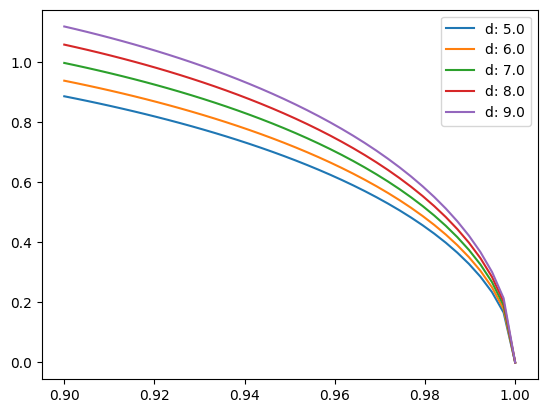

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def h0(psi0,d):
  psi0d=psi0*d
  psi02=psi0**2
  denominator=np.sinh(psi0d)/psi0d-1
  numerator=2*(psi02)*(1-psi02)*np.cosh(psi0d/2)**2
  h02=numerator/denominator
  return h02**(1/2)

P0=np.linspace(0.9,1,40)
for d in np.linspace(5,9,5):
  H0=h0(P0,d)
  plt.plot(P0,H0,label=f"d: {d}")
plt.legend()
plt.show()

## b. $\psi_0$ near full range (only avoiding 'divide by zero'), $d$ above and below $d_c$

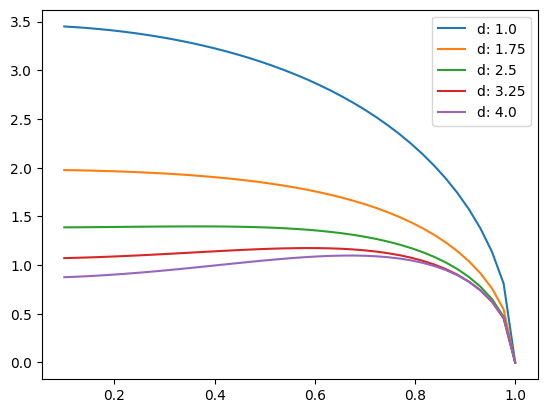

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def h0(psi0,d):
  psi0d=psi0*d
  psi02=psi0**2
  denominator=np.sinh(psi0d)/psi0d-1
  numerator=2*(psi02)*(1-psi02)*np.cosh(psi0d/2)**2
  h02=numerator/denominator
  return h02**(1/2)

P0=np.linspace(0.1,1,40)
for d in np.linspace(1,4,5):
  H0=h0(P0,d)
  plt.plot(P0,H0,label=f"d: {d}")
plt.legend()

## c. Slab/film with vacuum boundaries at x=-L/2 and x=L/2 from GL equations.

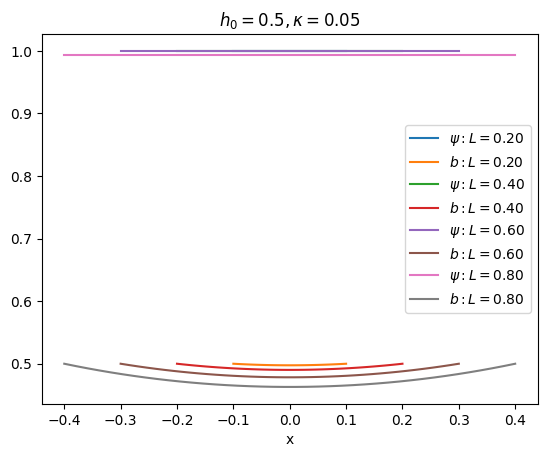

In [3]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../practice')

import matplotlib.pyplot as plt
from glcd import plt1D,nat,SC

h0,kappa=1/2,1/20

for L in range(2,10,2):
    plt1D(kappa,nat(-L/20,h0),nat(L/20,h0),f"L={L/10:.2f}")

plt.xlabel("x")
plt.title(f"$h_0={h0},\kappa={kappa}$")
plt.legend()
plt.show()

## d. Perturbation approximation to same

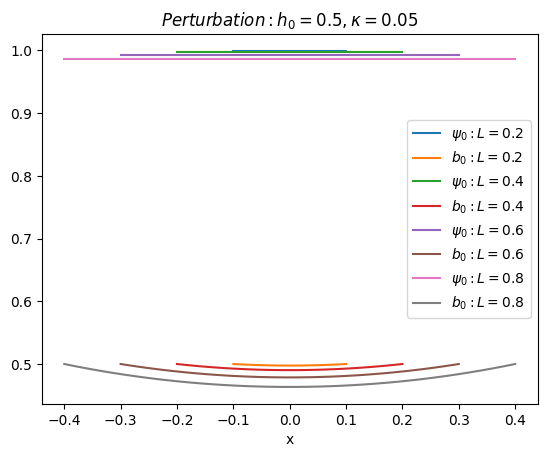

In [4]:
import numpy as np
h0,kappa=1/2,1/20

def psi0(x,d):
  return 1-(h0*d)**2/12

def b0(x,d):
  psi0h0d=psi0(0,d)
  return h0*np.cosh(psi0h0d*x)/np.cosh(psi0h0d*d/2) 

for L in range(2,10,2):
  X=np.linspace(-L/20,L/20,40)  
  plt.plot(X,np.full(X.size,psi0(0,L/10)),label=f"$\psi_0: L={L/10}$")
  plt.plot(X,b0(X,L/10),label=f"$b_0: L={L/10}$")

plt.xlabel("x")
plt.title(f"$Perturbation: h_0={h0},\kappa={kappa}$")
plt.legend()
plt.show()

## e. Comparison of GL and perturbation predictions

Note that the auto axes of matplotlib tends to exagerate the differences.

6.928203230275509


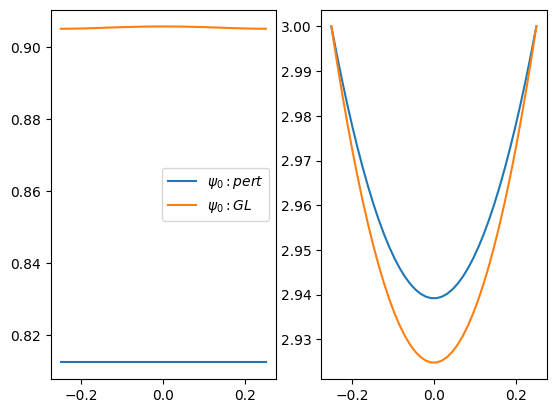

In [5]:
from glcd import gl1D,plotn

L=.5
kappa=0.5
h0=3
sol=gl1D(kappa,nat(-L/2,h0),nat(L/2,h0))
X=np.linspace(-L/2,L/2,40) 
plt.subplot(1,2,1)
plt.plot(X,np.full(X.size,psi0(0,L)),label=f"$\psi_0: pert$")
plotn(sol,0,"\psi_0: GL")
plt.legend()
plt.subplot(1,2,2)
plt.plot(X,b0(X,L),label=f"$b_0: pert$")
plotn(sol,3)
print(12**(1/2)/L) # expected hc

## f. Gibbs free energy from GL and perturbation

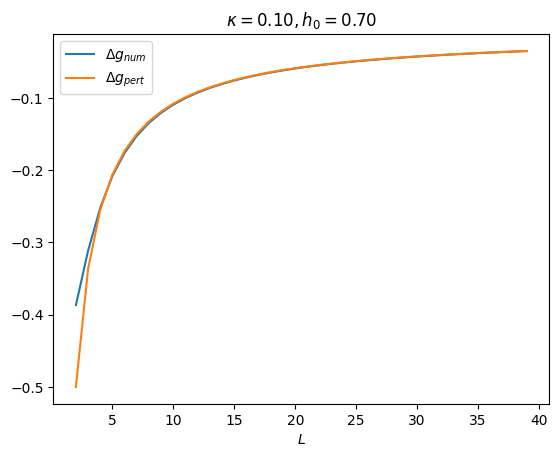

In [6]:
from scipy.integrate import quad

def G1A(kappa,h0,L):
  A=nat(0,h0)
  B=nat(L,h0)
  sol=gl1D(kappa,A,B)
  def g(x):
    f,df,a,da=sol.sol(x)
    return -f**4/2+da**2-2*h0*da
  return quad(g,0,L)

h0=0.7
kappa=.1
L=list(range(2,40))
plot=[(G1A(kappa,h0,l)[0]/l+h0**2,-1/2+h0**2*(1-2/l)) for l in L]
plt.plot(L,plot,label=["$\Delta g_{num}$","$\Delta g_{pert}$"])
plt.xlabel("$L$")
plt.title(f"$\kappa={kappa:.2f}, h_0={h0:.2f}$")
plt.legend()
plt.show()

## g. Gibbs free energy difference as function of $\psi_0$ for various $h_0$

We chose $d=8$ and $d=1$ as examples of $d>d_c$ and $d<d_c$, respectively, without applying {eq}`h0psi` to {eq}`dgpert` 

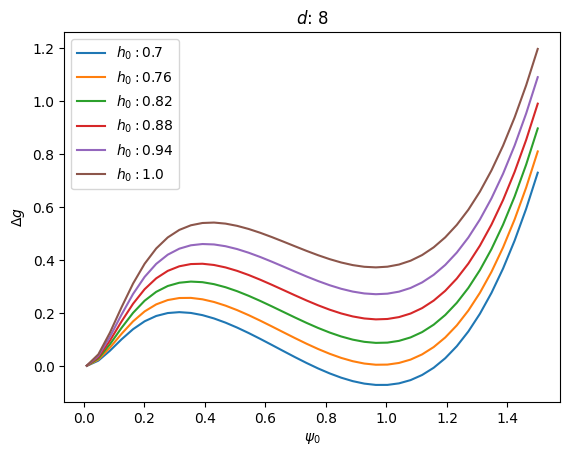

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def dg(f0,h0,d):
  f0d=f0*d
  return (1-np.tanh(f0d)/f0d)*h0**2-f0**2+f0**4/2
  
d=8
F0=np.linspace(0.01,1.5,40)
for h0 in np.linspace(0.7,1,6):
  plot=[dg(f0,h0,d) for f0 in F0]
  plt.plot(F0,plot,label=f"$h_0: {h0}$")
plt.xlabel("$\psi_0$")
plt.title(f"$d$: {d}")
plt.ylabel("$\Delta g$")
plt.legend()
plt.show()

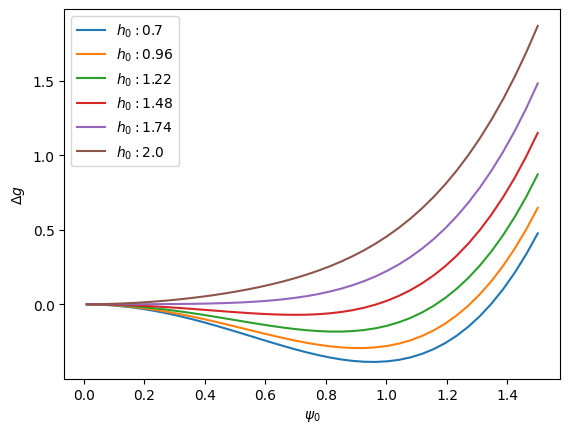

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def dg(f0,h0,d):
  f0d=f0*d
  return (1-np.tanh(f0d)/f0d)*h0**2-f0**2+f0**4/2
  
d=1
F0=np.linspace(0.01,1.5,40)
for h0 in np.linspace(0.7,2,6):
  plot=[dg(f0,h0,d) for f0 in F0]
  plt.plot(F0,plot,label=f"$h_0: {h0}$")
plt.xlabel("$\psi_0$")
plt.ylabel("$\Delta g$")
plt.legend()
plt.show()